### What Are The Most Demanded Skills For The 3 Most Popular Data Job Roles?

#### Methodology
1. Clean job_skills column
2. Calculate skills count based on job_title_short
3. Calculate Skills Percentage
4. Plot The findings

In [13]:
# Importing Libraries
import pandas as pd 
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast
import seaborn as sns
from adjustText import adjust_text

# loading the data
dataset= load_dataset('lukebarousse/data_jobs')
df= dataset['train'].to_pandas()

# Hide error message
from IPython.display import display
display()

# Cleaning the Data 
df['job_posted_date'] = pd.to_datetime(df['job_posted_date']) # converting to the right time value
df['job_skills'] = df['job_skills'].apply(lambda skills : ast.literal_eval(skills) if pd.notna(skills) else skills) # converting job_skills to a list

In [14]:
df_UK= df[df['job_country'] == 'United Kingdom']

In [15]:
df_skills = df_UK.explode('job_skills')

In [16]:
df_skills[['job_title_short', 'job_skills']]

,job_title_short,job_skills
15,Data Engineer,python
15,Data Engineer,sql
15,Data Engineer,power bi
45,Senior Data Analyst,sql
45,Senior Data Analyst,python
...,...,...
785642,Data Engineer,qlik
785642,Data Engineer,confluence
785642,Data Engineer,jira
785676,Senior Data Scientist,r


In [17]:
df_skills_count = df_skills.groupby(['job_title_short','job_skills']).size()
df_skills_count = df_skills_count.reset_index(name= 'skills_count')
df_skills_count.sort_values(by= 'skills_count', ascending= False, inplace= True)
df_skills_count

,job_title_short,job_skills,skills_count
532,Data Engineer,sql,7050
502,Data Engineer,python,6462
687,Data Scientist,python,6329
390,Data Engineer,azure,4865
345,Data Analyst,sql,4467
...,...,...,...
757,Machine Learning Engineer,aurora,1
751,Data Scientist,wsl,1
1,Business Analyst,airtable,1
693,Data Scientist,react.js,1


In [18]:
job_titles = df_skills_count['job_title_short'].unique().tolist()
job_titles = sorted(job_titles[:3])
job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

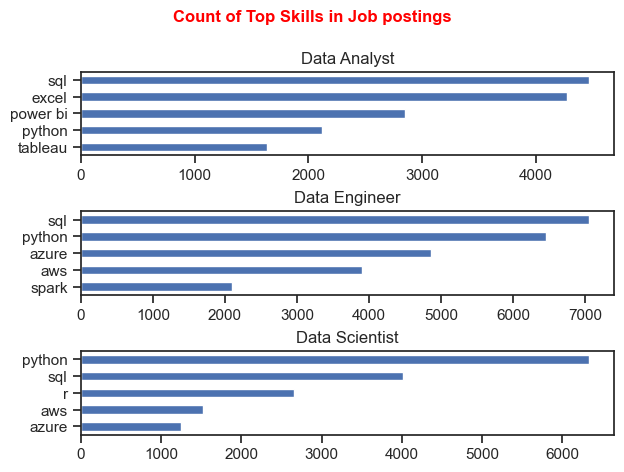

In [19]:
fig, ax= plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind= 'barh', x= 'job_skills', y= 'skills_count', ax= ax[i], title= job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)

fig.suptitle('Count of Top Skills in Job postings', fontsize= 12, color= 'red', weight= "bold")
fig.tight_layout(h_pad= 0.5)
plt.show()    

In [20]:
df_job_total = df_UK['job_title_short'].value_counts()
df_job_total = df_job_total.reset_index(name= 'jobs_total')

In [21]:
df_skill_perc = df_skills_count.merge(df_job_total, how= 'left', on= 'job_title_short')

In [22]:
df_skill_perc['skills_percent']= 100 * df_skill_perc['skills_count']/df_skill_perc['jobs_total']
df_skill_perc

,job_title_short,job_skills,skills_count,jobs_total,skills_percent
0,Data Engineer,sql,7050,11807,59.710341
1,Data Engineer,python,6462,11807,54.730245
2,Data Scientist,python,6329,9148,69.184521
3,Data Engineer,azure,4865,11807,41.204370
4,Data Analyst,sql,4467,10482,42.615913
...,...,...,...,...,...
1414,Machine Learning Engineer,aurora,1,317,0.315457
1415,Data Scientist,wsl,1,9148,0.010931
1416,Business Analyst,airtable,1,827,0.120919
1417,Data Scientist,react.js,1,9148,0.010931


<Figure size 1500x600 with 0 Axes>

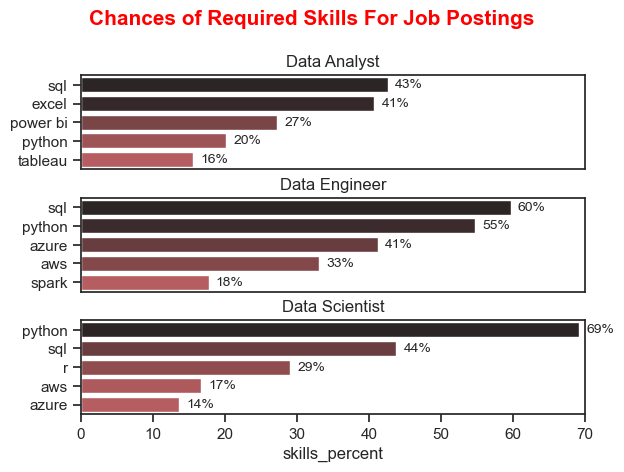

In [23]:
plt.figure(figsize= (15,6))
fig, ax= plt.subplots(len(job_titles), 1)
sns.set_theme(style= 'ticks')
for i, job_title in enumerate(job_titles):
    df_plot = df_skill_perc[df_skill_perc['job_title_short'] == job_title].head(5)
    sns.barplot(df_plot, x='skills_percent', y= 'job_skills', hue= 'skills_count', palette='dark:r_r', ax=ax[i] )
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_title(job_title)
    ax[1].set_xlabel('')
    ax[i].set_xlim(0,70)

    for n, v in enumerate(df_plot['skills_percent']):
        ax[i].text(v+1, n,f'{v:.0f}%', va= 'center', fontsize= 10)

    if i!= len(job_titles) - 1:
      ax[i].set_xticks([])

    ax[0].set_xlabel('')  

fig.suptitle('Chances of Required Skills For Job Postings', fontsize= 15, color= 'red', weight= "bold")
fig.tight_layout(h_pad= 0.5)
plt.show() 